# Appendix 1 CourseWork Code
### CS7052 MACHINE LEARNING COURSEWORK
### A REPORT ON RECURRENT NEURAL NETWORK
### CASE STUDY: STUDENT DROPOUT PREDICTION

### BY
### Khatereh Khorami 23021834,  Samir Rahimy 22059533, Hamzeh Kabuli 22068321
### _SUBMITTED TO: DR. ELAHEH HOMAYOUNVALA


# 1. Importing Library

In [49]:
# import libraries and reading packages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import missingno as msno
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import SimpleRNN, Dropout, Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from keras.regularizers import l1_l2
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from sklearn.utils import class_weight
from keras.callbacks import Callback
from sklearn.utils.class_weight import compute_class_weight
from keras.optimizers import Adam  
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_val_score, StratifiedKFold
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline as make_imblearn_pipeline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder

# 2. Reading DataSet

In [50]:
# Load Datasets
stu = pd.read_csv('students_result_97.csv')

# 3. Data Profiling

In [51]:
stu.head()

,Student_ID,Province,Age at enrollment,Marital Status,Family Size,Gender,Fund,Absencies 1st sem,Absencies 2nd sem,Absencies 3rd sem,...,Absencies 8th sem,GPA 1st sem,GPA 2nd sem,GPA 3rd sem,GPA 4th sem,GPA 5th sem,GPA 6th sem,GPA 7th sem,GPA 8th sem,Result
0,97221101,Kabul,18,single,5,f,No,3,2,1,...,1.0,64,88,91,85.0,82.0,87.0,85.0,90.0,Graduate
1,97221102,Daykundi,18,single,6,f,No,2,2,2,...,3.0,85,61,78,82.0,78.0,71.0,69.0,73.0,Graduate
2,97221103,Balkh,18,single,6,f,No,0,3,3,...,3.0,85,62,76,66.0,89.0,72.0,76.0,81.0,Graduate
3,97221104,Balkh,20,married,9,f,No,0,1,2,...,1.0,72,83,67,71.0,60.0,73.0,76.0,71.0,Graduate
4,97221105,Kabul,18,single,4,f,No,0,1,1,...,0.0,82,60,78,72.0,80.0,80.0,71.0,92.0,Graduate


In [52]:
len(stu)

414

In [53]:
stu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Student_ID         414 non-null    int64  
 1   Province           414 non-null    object 
 2   Age at enrollment  414 non-null    int64  
 3   Marital Status     414 non-null    object 
 4   Family Size        414 non-null    int64  
 5   Gender             414 non-null    object 
 6   Fund               414 non-null    object 
 7   Absencies 1st sem  414 non-null    int64  
 8   Absencies 2nd sem  414 non-null    int64  
 9   Absencies 3rd sem  414 non-null    int64  
 10  Absencies 4th sem  410 non-null    float64
 11  Absencies 5th sem  398 non-null    float64
 12  Absencies 6th sem  379 non-null    float64
 13  Absencies 7th sem  370 non-null    float64
 14  Absencies 8th sem  369 non-null    float64
 15  GPA 1st sem        414 non-null    int64  
 16  GPA 2nd sem        414 non

# 4. Showing NAN values

In [54]:
nan_values = stu.isnull().sum()
print(nan_values)

Student_ID            0
Province              0
Age at enrollment     0
Marital Status        0
Family Size           0
Gender                0
Fund                  0
Absencies 1st sem     0
Absencies 2nd sem     0
Absencies 3rd sem     0
Absencies 4th sem     4
Absencies 5th sem    16
Absencies 6th sem    35
Absencies 7th sem    44
Absencies 8th sem    45
GPA 1st sem           0
GPA 2nd sem           0
GPA 3rd sem           0
GPA 4th sem           4
GPA 5th sem          17
GPA 6th sem          35
GPA 7th sem          44
GPA 8th sem          45
Result                0
dtype: int64


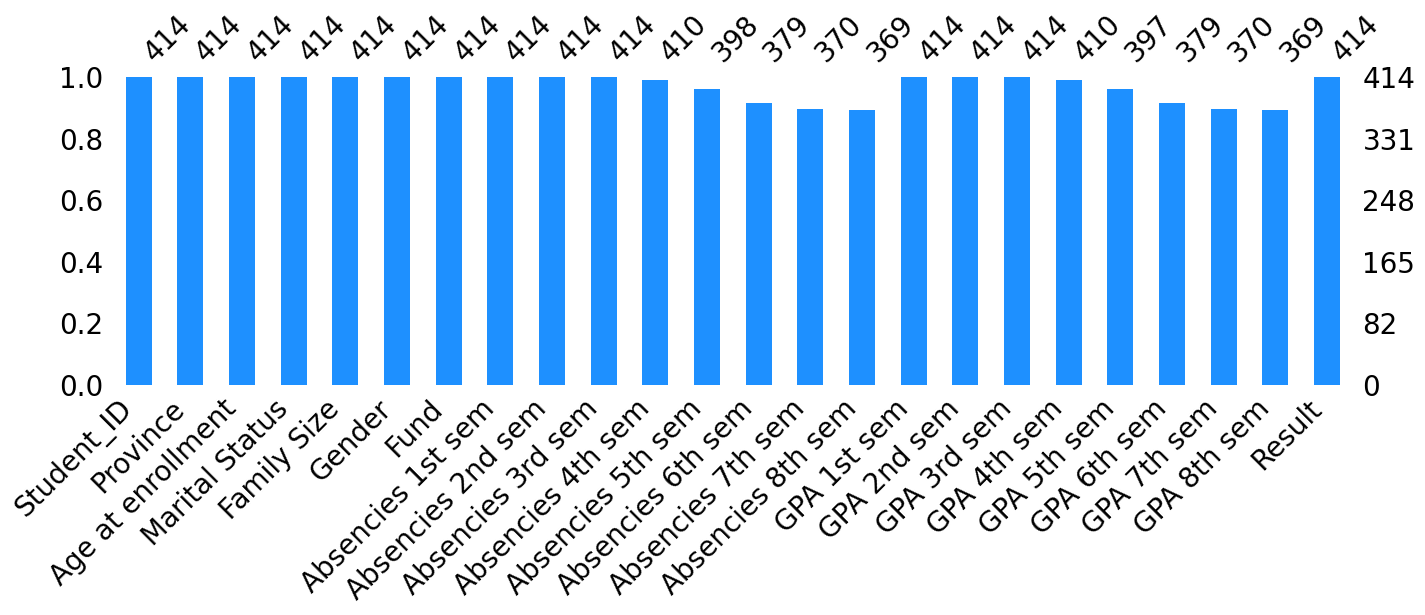

In [55]:
## Visualizing missing value
msno.bar(stu, figsize=(16, 4), fontsize=20, color="dodgerblue")
plt.show()

# 5.Dependencies Analysis 

## 5.1. Showing the relationship between selected features and Result In Form of Plot
### Hint: at first we wanted to find important field by plotting

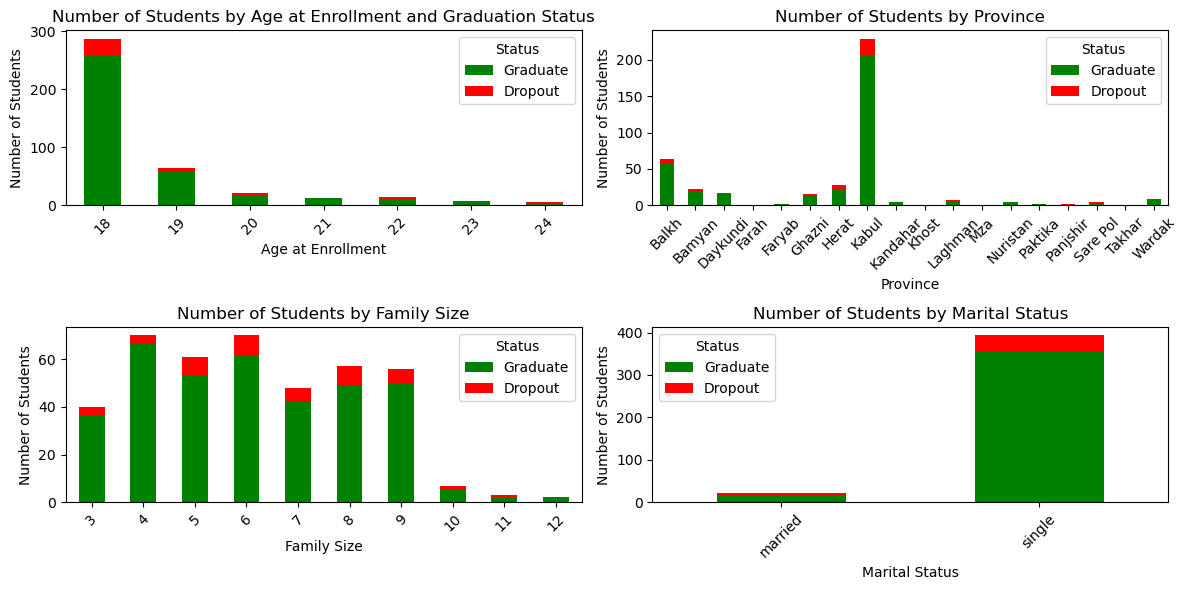

In [56]:
stu['Result_numeric'] = stu['Result'].apply(lambda x: 1 if x == 'Dropout' else 0)

# Creating the plots
fig, axs = plt.subplots(2, 2, figsize=(12, 6))

# Plot for Age at Enrollment
age_result_counts = stu.groupby(['Age at enrollment', 'Result_numeric']).size().unstack(fill_value=0)
age_result_counts.columns = ['Graduate', 'Dropout']
age_result_counts.plot(kind='bar', stacked=True, color=['green', 'red'], ax=axs[0, 0])
axs[0, 0].set_title('Number of Students by Age at Enrollment and Graduation Status')
axs[0, 0].set_xlabel('Age at Enrollment')
axs[0, 0].set_ylabel('Number of Students')
axs[0, 0].legend(title='Status')
axs[0, 0].tick_params(axis='x', rotation=45)

# Plot for Province
province_result_counts = stu.groupby(['Province', 'Result_numeric']).size().unstack(fill_value=0)
province_result_counts.columns = ['Graduate', 'Dropout']
province_result_counts.plot(kind='bar', stacked=True, color=['green', 'red'], ax=axs[0, 1])
axs[0, 1].set_title('Number of Students by Province')
axs[0, 1].set_xlabel('Province')
axs[0, 1].set_ylabel('Number of Students')
axs[0, 1].legend(title='Status')
axs[0, 1].tick_params(axis='x', rotation=45)

# Plot for Family Size
family_size_result_counts = stu.groupby(['Family Size', 'Result_numeric']).size().unstack(fill_value=0)
family_size_result_counts.columns = ['Graduate', 'Dropout']
family_size_result_counts.plot(kind='bar', stacked=True, color=['green', 'red'], ax=axs[1, 0])
axs[1, 0].set_title('Number of Students by Family Size')
axs[1, 0].set_xlabel('Family Size')
axs[1, 0].set_ylabel('Number of Students')
axs[1, 0].legend(title='Status')
axs[1, 0].tick_params(axis='x', rotation=45)

# Plot for Marital Status
marital_status_result_counts = stu.groupby(['Marital Status', 'Result_numeric']).size().unstack(fill_value=0)
marital_status_result_counts.columns = ['Graduate', 'Dropout']
marital_status_result_counts.plot(kind='bar', stacked=True, color=['green', 'red'], ax=axs[1, 1])
axs[1, 1].set_title('Number of Students by Marital Status')
axs[1, 1].set_xlabel('Marital Status')
axs[1, 1].set_ylabel('Number of Students')
axs[1, 1].legend(title='Status')
axs[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 6. Feature Engineering and Selection
### adding New Feature as AbsenciesMean with calculating average of absencies in 8 sem and creating new feature to consider as an important field

In [57]:
# Load the dataset
file_path = 'students_result_97.csv'  
data = pd.read_csv(file_path)

# Handling missing values for Absencies by filling them with 4 the maximum of it
data['Absencies 1st sem']=data['Absencies 1st sem'].fillna(4)
data['Absencies 2nd sem']=data['Absencies 2nd sem'].fillna(4)
data['Absencies 3rd sem']=data['Absencies 3rd sem'].fillna(4)
data['Absencies 4th sem']=data['Absencies 4th sem'].fillna(4)
data['Absencies 5th sem']=data['Absencies 5th sem'].fillna(4)
data['Absencies 6th sem']=data['Absencies 6th sem'].fillna(4)
data['Absencies 7th sem']=data['Absencies 7th sem'].fillna(4)
data['Absencies 8th sem']=data['Absencies 8th sem'].fillna(4)
data_filled = data.fillna(0)

# List of columns to calculate the mean of
absence_columns = [
    'Absencies 1st sem', 'Absencies 2nd sem', 'Absencies 3rd sem',
    'Absencies 4th sem', 'Absencies 5th sem', 'Absencies 6th sem',
    'Absencies 7th sem', 'Absencies 8th sem'
]

# Creating the 'Absence_Mean' feature
data_filled['Absence_Mean'] = data_filled[absence_columns].mean(axis=1)

# Dropping the original absence columns
data_filled.drop(columns=absence_columns, inplace=True)

# The data now includes the 'Absence_Mean' column
print(data_filled.head())


   Student_ID  Province  Age at enrollment Marital Status  Family Size Gender  \
0    97221101     Kabul                 18         single            5      f   
1    97221102  Daykundi                 18         single            6      f   
2    97221103     Balkh                 18         single            6      f   
3    97221104     Balkh                 20        married            9      f   
4    97221105     Kabul                 18         single            4      f   

  Fund  GPA 1st sem  GPA 2nd sem  GPA 3rd sem  GPA 4th sem  GPA 5th sem  \
0   No           64           88           91         85.0         82.0   
1   No           85           61           78         82.0         78.0   
2   No           85           62           76         66.0         89.0   
3   No           72           83           67         71.0         60.0   
4   No           82           60           78         72.0         80.0   

   GPA 6th sem  GPA 7th sem  GPA 8th sem    Result  Absence_Me

# 6.1. Changing All categorical Field to numeric

In [58]:
# Load the dataset
file_path = 'students_result_97.csv'  
data = pd.read_csv(file_path)

# Handling missing values by filling them with 0
# Handling missing values for Absencies by filling them with 4 the maximum of it
data['Absencies 1st sem']=data['Absencies 1st sem'].fillna(4)
data['Absencies 2nd sem']=data['Absencies 2nd sem'].fillna(4)
data['Absencies 3rd sem']=data['Absencies 3rd sem'].fillna(4)
data['Absencies 4th sem']=data['Absencies 4th sem'].fillna(4)
data['Absencies 5th sem']=data['Absencies 5th sem'].fillna(4)
data['Absencies 6th sem']=data['Absencies 6th sem'].fillna(4)
data['Absencies 7th sem']=data['Absencies 7th sem'].fillna(4)
data['Absencies 8th sem']=data['Absencies 8th sem'].fillna(4)
data_filled = data.fillna(0)

# Converting 'Result' to numeric values: 0 and 1
# Assuming 'Dropout' as 1 and any other category as 0
data_filled['Result_numeric'] = data_filled['Result'].apply(lambda x: 1 if x == 'Dropout' else 0)
data_filled['Gender_numeric'] = data_filled['Gender'].apply(lambda x: 1 if x == 'm' else 0)
data_filled['Marriage_numeric'] = data_filled['Marital Status'].apply(lambda x: 1 if x == 'married' else 0)
data_filled['Fund_numeric'] = data_filled['Fund'].apply(lambda x: 1 if x == 'Fund' else 0)

# Selecting features and the target variable
# Assuming all columns except 'Result' and 'Result_numeric' are features
features = data_filled.drop(columns=['Result', 'Result_numeric'])
features = data_filled.drop(columns=['Gender', 'Gender_numeric'])
features = data_filled.drop(columns=['Marital Status', 'Marriage_numeric'])
features = data_filled.drop(columns=['Fund', 'Fund_numeric'])
features_encoded = pd.get_dummies(features, drop_first=False)
features_encoded

,Student_ID,Age at enrollment,Family Size,Absencies 1st sem,Absencies 2nd sem,Absencies 3rd sem,Absencies 4th sem,Absencies 5th sem,Absencies 6th sem,Absencies 7th sem,...,Province_Panjshir,Province_Sare Pol,Province_Takhar,Province_Wardak,Marital Status_married,Marital Status_single,Gender_f,Gender_m,Result_Dropout,Result_Graduate
0,97221101,18,5,3,2,1,0.0,0.0,2.0,2.0,...,False,False,False,False,False,True,True,False,False,True
1,97221102,18,6,2,2,2,1.0,2.0,3.0,2.0,...,False,False,False,False,False,True,True,False,False,True
2,97221103,18,6,0,3,3,0.0,2.0,1.0,2.0,...,False,False,False,False,False,True,True,False,False,True
3,97221104,20,9,0,1,2,2.0,2.0,1.0,1.0,...,False,False,False,False,True,False,True,False,False,True
4,97221105,18,4,0,1,1,2.0,0.0,0.0,0.0,...,False,False,False,False,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,97221662,18,6,0,3,4,2.0,0.0,0.0,1.0,...,False,False,False,False,False,True,True,False,False,True
410,97221663,18,5,1,1,1,3.0,1.0,0.0,4.0,...,False,False,False,False,False,True,False,True,False,True
411,97221664,19,8,4,3,3,2.0,3.0,4.0,4.0,...,False,False,False,False,False,True,False,True,False,True
412,97221665,18,9,4,3,4,4.0,4.0,4.0,4.0,...,False,False,False,False,False,True,False,True,True,False


# 6.2. Determining 10 top Features by using Logestic Regression

#### Adding SMOTE To balance the Test And Train DataSet Then Feature Selection By Caculating Coefficient 

In [59]:
# Load the dataset
file_path = 'students_result_97.csv'
stu_data = pd.read_csv(file_path)

# Handling missing values for Absencies by filling them with 4 the maximum of it
stu_data['Absencies 1st sem']=stu_data['Absencies 1st sem'].fillna(4)
stu_data['Absencies 2nd sem']=stu_data['Absencies 2nd sem'].fillna(4)
stu_data['Absencies 3rd sem']=stu_data['Absencies 3rd sem'].fillna(4)
stu_data['Absencies 4th sem']=stu_data['Absencies 4th sem'].fillna(4)
# Addressing the Nan values in data set
stu_data = stu_data.fillna(0)

# Changing the categorical Value to numerical value
stu_data['Result'] = stu_data['Result'].apply(lambda x: 1 if x == 'Dropout' else 0)
stu_data['Gender'] = stu_data['Gender'].apply(lambda x: 1 if x == 'm' else 0)
stu_data['Marital Status'] = stu_data['Marital Status'].apply(lambda x: 1 if x == 'married' else 0)
stu_data['Fund'] = stu_data['Fund'].apply(lambda x: 1 if x == 'Fund' else 0)
stu_data = stu_data.drop(columns=['Student_ID', 'Province'])


# Selecting features and the target variable
target = stu_data['Result']

# Splitting the dataset into training and testing sets
features = stu_data.drop(columns=['Result'])
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Applying SMOTE to balance the Traing Data 
# We allpy SMOTE only to the training data, not the testing data, as the testing data should represent the real-world distribution of classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# # Creating and fitting the logistic regression model
logreg = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
logreg.fit(X_train_smote, y_train_smote)

# Predicting on the test set
y_pred = logreg.predict(X_test)

# # Evaluating the model
classification_report_output = classification_report(y_test, y_pred)

# # Getting feature importances (coefficients)
feature_importances = pd.Series(logreg.coef_[0], index=features.columns).sort_values(ascending=False)

# # Converting the top 10 feature importances to a DataFrame
top_10_features = feature_importances.head(10).reset_index()
top_10_features.columns = ['Feature', 'Coefficient']
training_accuracy = logreg.score(X_train_smote, y_train_smote)
test_accuracy = accuracy_score(y_test, y_pred)
# # Printing the outputs
# print("Classification Report:\n", classification_report_output)
# print("Confusion Matrix:\n", confusion_matrix_output)
# print("Top 10 Features:\n", top_15_features)

# Printing the accuracy and top 10 features
print("Training Accuracy:", training_accuracy)
print("Test Accuracy:", test_accuracy)
print("Top 10 Features Influencing Dropout:")
print(top_10_features)

Training Accuracy: 1.0
Test Accuracy: 0.992
Top 10 Features Influencing Dropout:
             Feature  Coefficient
0        Family Size     0.102385
1        GPA 6th sem     0.088303
2        GPA 3rd sem     0.082686
3  Absencies 3rd sem     0.043930
4  Absencies 5th sem     0.041575
5        GPA 1st sem     0.032159
6  Absencies 1st sem     0.024855
7  Absencies 4th sem     0.023174
8        GPA 7th sem     0.012566
9     Marital Status     0.000097


# 7. Starting Prediction the Model

# 7.1. Preparing Data Sequence for  RNN

### All Data Processing in one code(include Data Cleansing-Feature Selection-Creating Data Sequence)

In [60]:
#____Load the dataset
file_path = 'students_result_97.csv'  
stu_data = pd.read_csv(file_path)

#_____Changing Feature Resut from categorical to numerical ____________
#_____It is important that Dropout=1 and Graduate=0 _______________
stu_data['Result'] = stu_data['Result'].apply(lambda x: 1 if x == 'Dropout' else 0)

#_______ Deleting All Features that aren't belong to top features to creating data Sequence
stu_data.drop(columns=['Student_ID','Province','Age at enrollment','Marital Status','Family Size','Gender','Fund','GPA 5th sem','GPA 6th sem','GPA 7th sem','GPA 8th sem',
    'Absencies 5th sem','Absencies 6th sem','Absencies 7th sem','Absencies 8th sem'],inplace=True)

#_________ Creating list of GPA For 4 first semester
gpa_columns = [
    'GPA 1st sem', 'GPA 2nd sem', 'GPA 3rd sem', 'GPA 4th sem']
abs_columns=[
    'Absencies 1st sem', 'Absencies 2nd sem', 'Absencies 3rd sem', 'Absencies 4th sem']
# stu_data['Absence_Mean'] = data_filled[abs_columns].mean(axis=1)
# stu_data.dropna(subset=gpa_columns)
# Deleting records that have at least one NaN in the specified GPA columns
# because if a student hasn'r GPA For each semester it means drop out and it causes biases
# stu_data.dropna(subset=gpa_columns)

# Populating Zero instead of NAN Values for assure Complting the data

stu_data['Absencies 1st sem'] = stu_data['Absencies 1st sem'].fillna(4)
stu_data['Absencies 2nd sem'] = stu_data['Absencies 2nd sem'].fillna(4)
stu_data['Absencies 3rd sem'] = stu_data['Absencies 3rd sem'].fillna(4)
stu_data['Absencies 4th sem'] = stu_data['Absencies 4th sem'].fillna(4)
# Filling Nan values if exist with 0 Changing the Type of GAP 4Th and Absencies 4th to integer
stu_data = stu_data.fillna(0)
stu_data['GPA 4th sem']=stu_data['GPA 4th sem'].astype(int)
stu_data['Absencies 4th sem']=stu_data['Absencies 4th sem'].astype(int)
#________________ Write the ready Dataset to file
stu_data.to_csv('student_final.csv')
stu_data.head()

,Absencies 1st sem,Absencies 2nd sem,Absencies 3rd sem,Absencies 4th sem,GPA 1st sem,GPA 2nd sem,GPA 3rd sem,GPA 4th sem,Result
0,3,2,1,0,64,88,91,85,0
1,2,2,2,1,85,61,78,82,0
2,0,3,3,0,85,62,76,66,0
3,0,1,2,2,72,83,67,71,0
4,0,1,1,2,82,60,78,72,0


In [61]:
target=stu_data['Result']
target

0      0
1      0
2      0
3      0
4      0
      ..
409    0
410    0
411    0
412    1
413    0
Name: Result, Length: 414, dtype: int64

## 7.2. Creating Data Sequenct

In [62]:
#____________________________ Preparing Data Sequence ___________________________#
# Reshaping the data into a 3D format for RNN
# Number of time steps: 4 (for 4 semesters)
# Number of features per time step: 1 (GPA )

# Number of samples (students)
num_samples = stu_data.shape[0]

# Number of time steps (semesters)
num_timesteps = 4  # We are using 4 semesters in this example

# Number of features per time step
num_features = 2  # GPA and Absefor each semester

# Extracting the absencies and GPA columns as separate features
absencies = stu_data[['Absencies 1st sem', 'Absencies 2nd sem', 'Absencies 3rd sem', 'Absencies 4th sem']]
gpa = stu_data[['GPA 1st sem', 'GPA 2nd sem', 'GPA 3rd sem', 'GPA 4th sem']]
# stu_data['Result'] = stu_data['Result'].apply(lambda x: 1 if x == 'Dropout' else 0)
# Combining these into a single array with a timestep of 4 and 2 features
sequences = []
for i in range(len(stu_data)):
    sequence = []
    for j in range(4):
        sequence.append([absencies.iloc[i, j], gpa.iloc[i, j]])
    sequences.append(sequence)

#Creating Data Sequence Array
    sequences_array = np.array(sequences)

# Display the shape of the final sequence array
sequences_array.shape, sequences_array[:2]  # Display the shape and the first two sequence arrays


((414, 4, 2),
 array([[[ 3, 64],
         [ 2, 88],
         [ 1, 91],
         [ 0, 85]],
 
        [[ 2, 85],
         [ 2, 61],
         [ 2, 78],
         [ 1, 82]]], dtype=int64))

##### Splitting DataSet to Test And Train Data

In [63]:
target = stu_data['Result'].values

X_train, X_test, y_train, y_test = train_test_split(sequences_array, target, test_size=0.3, random_state=42)

# The shapes of the train and test sets
print("Training set shape (X, y):", X_train.shape, y_train.shape)
print("Testing set shape (X, y):", X_test.shape, y_test.shape)

Training set shape (X, y): (289, 4, 2) (289,)
Testing set shape (X, y): (125, 4, 2) (125,)


In [64]:
y_train

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0], dtype=int64)

In [65]:
X = stu_data.drop('Result', axis=1).values
y = stu_data['Result'].values

# Verify that we now have both classes in our target variable
print("Classes in 'y':", np.unique(y, return_counts=True))

Classes in 'y': (array([0, 1], dtype=int64), array([368,  46], dtype=int64))


## 8. Creating Simple RNN Model

## 8.1. The first desirable result for RNN Model with this parameter
##### the type of model is Sequential , which is a linear stack of layers.(Simple RNN)
##### RNN layer will have 100 neurons 
##### activation='tanh' which is a common activation function in neural networks.
##### the shape of the input: num_timesteps is the number of time steps in the sequence, and num_features is the number of features at each time step.
##### Dropout(0.3) is a layer that helps prevent overfitting by randomly setting a fraction 0.2 of input units to 0 at each update during training time, which helps prevent overfitting.
##### Dense(1, activation='sigmoid') is a fully connected neural network layer with a single neuron (1) that uses the sigmoid activation function
#### Optimizer Adam and loss function=cross intropy
##### number of Epochs=50 and batch size=32

Epoch 1/50
8/8 [==============================] - 2s 52ms/step - loss: 0.4058 - accuracy: 0.8874 - val_loss: 0.3338 - val_accuracy: 0.8966
Epoch 2/50
8/8 [==============================] - 0s 9ms/step - loss: 0.3620 - accuracy: 0.9004 - val_loss: 0.3423 - val_accuracy: 0.8966
Epoch 3/50
8/8 [==============================] - 0s 9ms/step - loss: 0.3383 - accuracy: 0.9048 - val_loss: 0.3307 - val_accuracy: 0.8966
Epoch 4/50
8/8 [==============================] - 0s 9ms/step - loss: 0.3273 - accuracy: 0.9091 - val_loss: 0.2959 - val_accuracy: 0.8966
Epoch 5/50
8/8 [==============================] - 0s 9ms/step - loss: 0.3046 - accuracy: 0.9048 - val_loss: 0.2784 - val_accuracy: 0.8966
Epoch 6/50
8/8 [==============================] - 0s 9ms/step - loss: 0.2718 - accuracy: 0.9048 - val_loss: 0.2776 - val_accuracy: 0.8966
Epoch 7/50
8/8 [==============================] - 0s 9ms/step - loss: 0.2593 - accuracy: 0.9048 - val_loss: 0.2747 - val_accuracy: 0.8966
Epoch 8/50
8/8 [=================

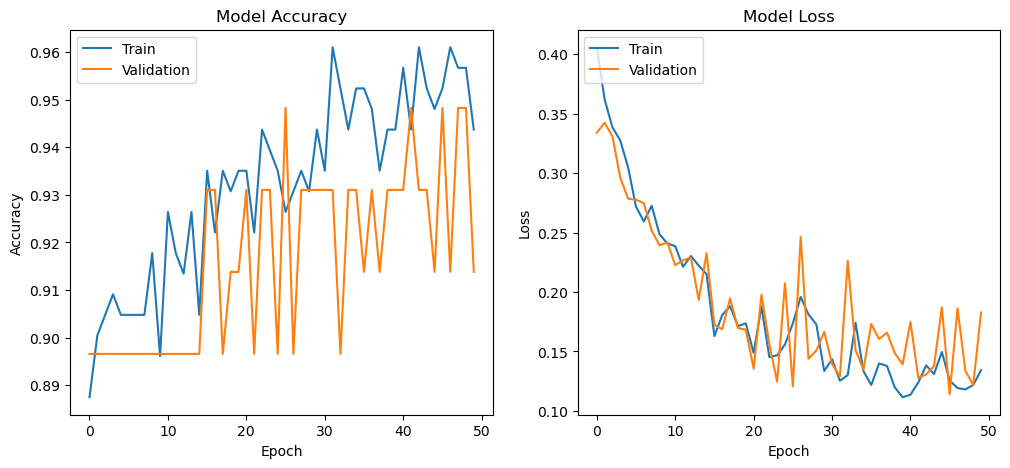

In [66]:
model = Sequential([
    SimpleRNN(100, activation='tanh', input_shape=(num_timesteps, num_features)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32") 

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Plotting training history
plt.figure(figsize=(12, 5))

# Plotting accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

## 8.2. another result for RNN Model with tuning parameters
##### the type of model is Sequential , which is a linear stack of layers.(Simple RNN)
##### RNN layer will have 100 neurons 
##### activation='relu' which is a common activation function in neural networks.
##### the shape of the input: num_timesteps is the number of time steps in the sequence, and num_features is the number of features at each time step.
##### added kernel_regularization with l2=0.001
##### Dropout(0.4) is a layer that helps prevent overfitting by randomly setting a fraction 0.2 of input units to 0 at each update during training time, which helps prevent overfitting.
##### Dense(1, activation='sigmoid') is a fully connected neural network layer with a single neuron (1) that uses the sigmoid activation function
##### Optimizer Adam and loss function=cross intropy and we added learning rate=0.001
##### number of Epochs=50 and batch size=32

Epoch 1/50
8/8 [==============================] - 2s 52ms/step - loss: 2.6960 - accuracy: 0.8355 - val_loss: 1.7915 - val_accuracy: 0.8966
Epoch 2/50
8/8 [==============================] - 0s 9ms/step - loss: 2.5141 - accuracy: 0.8312 - val_loss: 2.1058 - val_accuracy: 0.8966
Epoch 3/50
8/8 [==============================] - 0s 9ms/step - loss: 1.9177 - accuracy: 0.8615 - val_loss: 1.4965 - val_accuracy: 0.8966
Epoch 4/50
8/8 [==============================] - 0s 9ms/step - loss: 1.2022 - accuracy: 0.8528 - val_loss: 1.0706 - val_accuracy: 0.8966
Epoch 5/50
8/8 [==============================] - 0s 9ms/step - loss: 1.0423 - accuracy: 0.8745 - val_loss: 1.1520 - val_accuracy: 0.8966
Epoch 6/50
8/8 [==============================] - 0s 9ms/step - loss: 1.4988 - accuracy: 0.8312 - val_loss: 0.8834 - val_accuracy: 0.8966
Epoch 7/50
8/8 [==============================] - 0s 9ms/step - loss: 0.7278 - accuracy: 0.8701 - val_loss: 0.9093 - val_accuracy: 0.8966
Epoch 8/50
8/8 [=================

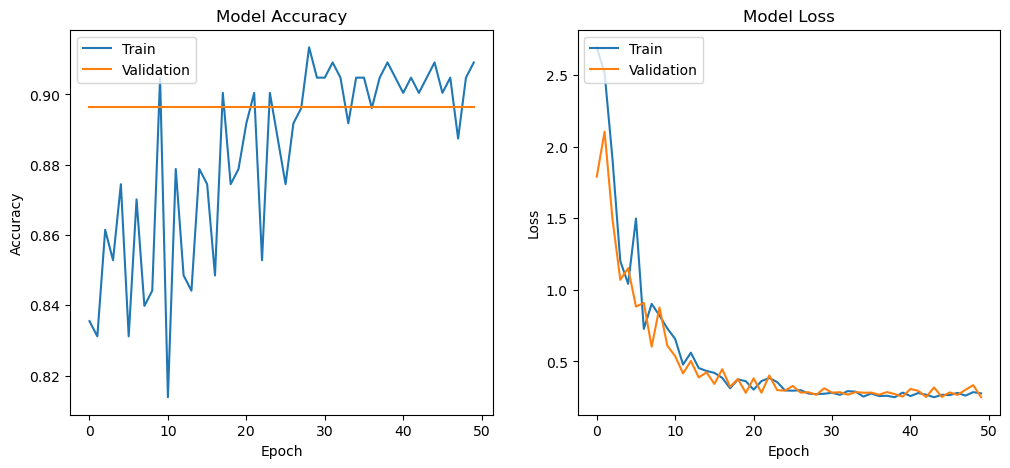

4/4 [==============================] - 0s 2ms/step


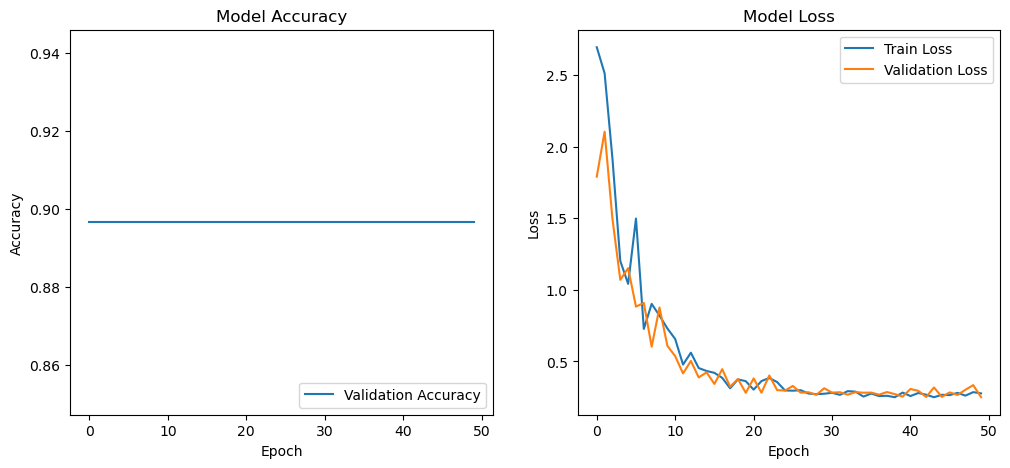

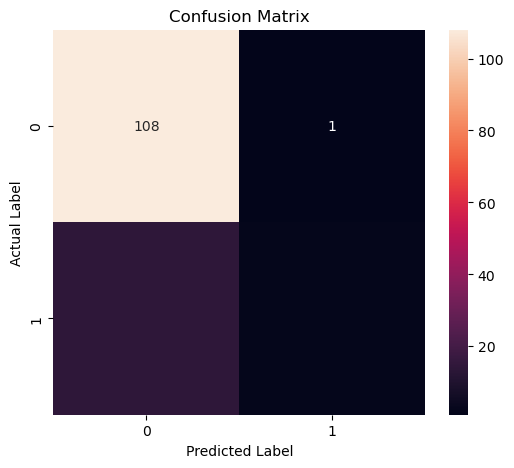

In [67]:
model = Sequential([
    SimpleRNN(100, activation='relu',  # Changed from 'relu' to 'tanh'
              input_shape=(num_timesteps, num_features),
              kernel_regularizer=l2(0.0002)),  # Added L2 regularization with alpha as 0.1
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

# added the learning rate by creating an optimizer instance
# and setting its `learning_rate` parameter.
optimizer = Adam(learning_rate=0.001)  # Example learning rate

model.compile(optimizer=optimizer, 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")  # Convert probabilities to class labels

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

# print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plotting training history
plt.figure(figsize=(12, 5))

# Plotting accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Probability Scores
probability_scores = model.predict(X_test)

# Plotting training, validation, and test accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
# plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.axhline(y=accuracy, color='green', linestyle='--', label='Test Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

## 8.3. another result for RNN Model with tuning parameters
##### Adding Class_weight for balancing the data
##### Adding one SIMPLE RNN Layer as a stack of previous to learn more
##### the type of model is Sequential , which is a linear stack of layers.(Simple RNN)
##### RNN layer will have 50 neurons 
##### activation is default in neural networks.
##### the shape of the input: is class_weight
##### added early_stopping for preventing of over fitting
##### Dropout(0.3) is a layer that helps prevent overfitting by randomly setting a fraction 0.2 of input units to 0 at each update during training time, which helps prevent overfitting.
##### Optimizer Adam and loss function=cross intropy 
##### number of Epochs=100 and batch size=32

In [68]:
# Calculate class weights due to class imbalance
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}
class_weights_dict

{0: 0.5579150579150579, 1: 4.816666666666666}

Epoch 1/100
8/8 [==============================] - 3s 73ms/step - loss: 0.7825 - accuracy: 0.3810 - val_loss: 0.7181 - val_accuracy: 0.1897
Epoch 2/100
8/8 [==============================] - 0s 11ms/step - loss: 0.7178 - accuracy: 0.5411 - val_loss: 0.5812 - val_accuracy: 0.8966
Epoch 3/100
8/8 [==============================] - 0s 11ms/step - loss: 0.6227 - accuracy: 0.7229 - val_loss: 0.4758 - val_accuracy: 0.8966
Epoch 4/100
8/8 [==============================] - 0s 10ms/step - loss: 0.7371 - accuracy: 0.7489 - val_loss: 0.5203 - val_accuracy: 0.8966
Epoch 5/100
8/8 [==============================] - 0s 10ms/step - loss: 0.6786 - accuracy: 0.6147 - val_loss: 0.7681 - val_accuracy: 0.2759
Epoch 6/100
8/8 [==============================] - 0s 10ms/step - loss: 0.7194 - accuracy: 0.3550 - val_loss: 0.8386 - val_accuracy: 0.1724
Epoch 7/100
8/8 [==============================] - 0s 11ms/step - loss: 0.6385 - accuracy: 0.5758 - val_loss: 0.4548 - val_accuracy: 0.8966
Epoch 8/100
8/8 [===

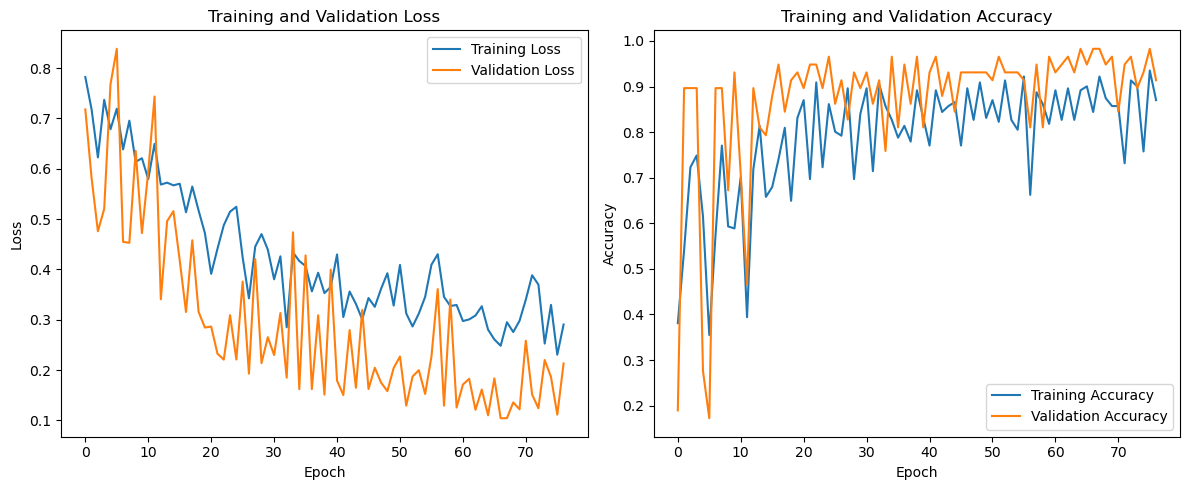

4/4 [==============================] - 0s 3ms/step


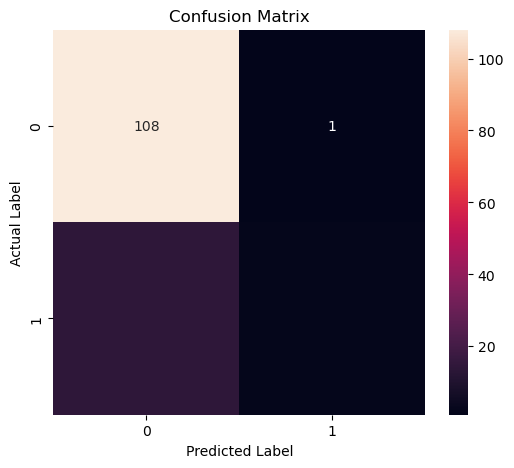

Test Accuracy: 90.40%
Test Precision: 66.67%
Test Recall: 12.50%
F1_score: 21.05%


In [69]:
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Define the RNN model
model = Sequential([
    SimpleRNN(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.3),
    SimpleRNN(50),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, class_weight=class_weights_dict, callbacks=[early_stopping])

# Evaluate the model on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Plotting training and validation loss and accuracy
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
test_precision = precision_score(y_test, y_pred_classes)
test_recall = recall_score(y_test, y_pred_classes)
f1_score = f1_score(y_test, y_pred_classes)
# Probability Scores
probability_scores = model.predict(X_test)
# Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Output the test metrics
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Precision: {test_precision * 100:.2f}%")
print(f"Test Recall: {test_recall * 100:.2f}%")
print(f"F1_score: {f1_score * 100:.2f}%")

In [70]:
y_train

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0], dtype=int64)

## 8.4. another result for RNN Model with tuning parameters
##### one of the good result using only stack models


Epoch 1/100
8/8 [==============================] - 4s 97ms/step - loss: 0.8023 - accuracy: 0.4286 - precision_12: 0.0970 - recall_12: 0.5417 - val_loss: 0.9411 - val_accuracy: 0.1034 - val_precision_12: 0.1034 - val_recall_12: 1.0000
Epoch 2/100
8/8 [==============================] - 0s 12ms/step - loss: 0.7526 - accuracy: 0.3636 - precision_12: 0.0927 - recall_12: 0.5833 - val_loss: 0.8155 - val_accuracy: 0.1034 - val_precision_12: 0.1034 - val_recall_12: 1.0000
Epoch 3/100
8/8 [==============================] - 0s 12ms/step - loss: 0.7471 - accuracy: 0.4545 - precision_12: 0.1136 - recall_12: 0.6250 - val_loss: 0.8083 - val_accuracy: 0.1034 - val_precision_12: 0.1034 - val_recall_12: 1.0000
Epoch 4/100
8/8 [==============================] - 0s 12ms/step - loss: 0.6356 - accuracy: 0.5238 - precision_12: 0.1475 - recall_12: 0.7500 - val_loss: 0.7531 - val_accuracy: 0.1724 - val_precision_12: 0.1111 - val_recall_12: 1.0000
Epoch 5/100
8/8 [==============================] - 0s 12ms/step 

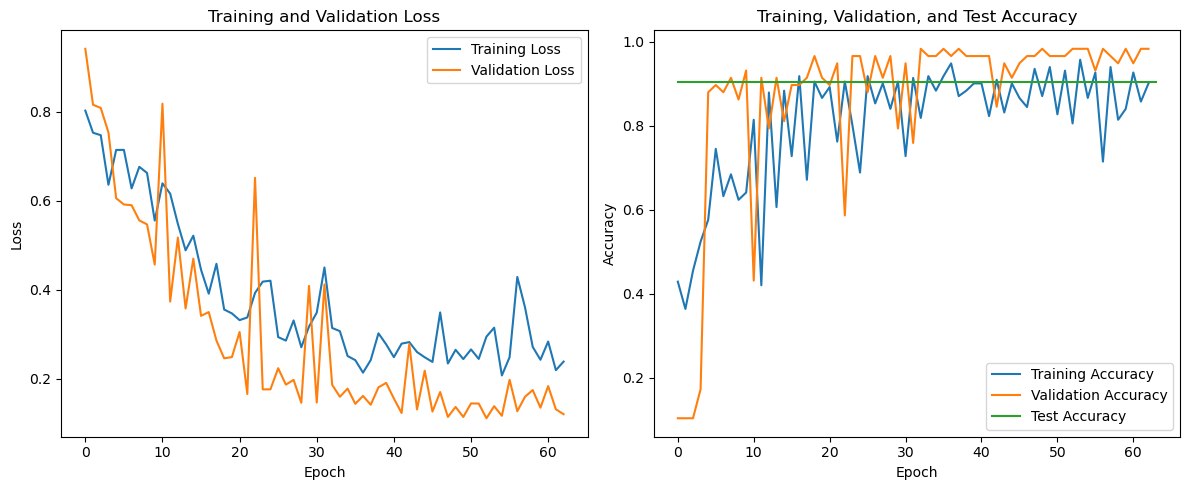

4/4 [==============================] - 0s 2ms/step


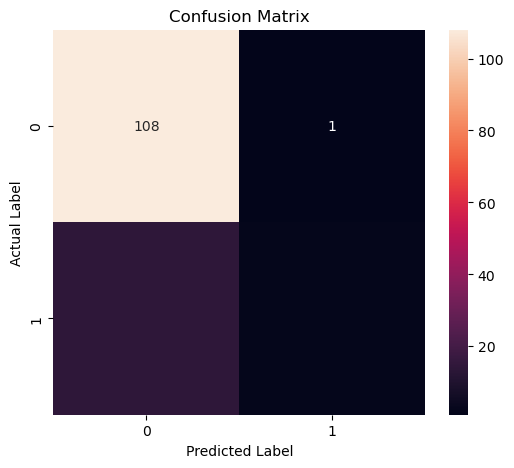

Test Accuracy: 90.40%
Test Precision: 62.50%
Test Recall: 62.50%


In [71]:
# Define the RNN model
model = Sequential([
    SimpleRNN(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    SimpleRNN(50),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, class_weight=class_weights_dict, callbacks=[early_stopping])

# Evaluate the model on test set and print the detailed classification report
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(X_test, y_test)
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plotting training and validation loss and accuracy
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(np.linspace(0, len(history.history['accuracy']), len(y_test)), [test_accuracy]*len(y_test), label='Test Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
# Probability Scores
probability_scores = model.predict(X_test)
# Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Output the test metrics
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Precision: {test_precision * 100:.2f}%")
print(f"Test Recall: {test_recall * 100:.2f}%")

## 8.5. Changing Parameters of Simple RNN Model to better predict and better tuning

##### All parameters is the same before  
##### cross validation addedd and we could get the best result
##### addedd calculating RUAC Parameter

3/3 [==============================] - 0s 3ms/step
Average Precision: 0.55
Average Recall: 0.56
Average F1-Score: 0.54
Average ROC AUC: 0.83
[[72  1]
 [ 4  5]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        73
           1       0.83      0.56      0.67         9

    accuracy                           0.94        82
   macro avg       0.89      0.77      0.82        82
weighted avg       0.93      0.94      0.93        82

3/3 [==============================] - 0s 4ms/step - loss: 0.1987 - accuracy: 0.9390
Test Accuracy: 93.90%
ROC AUC Score: 0.89


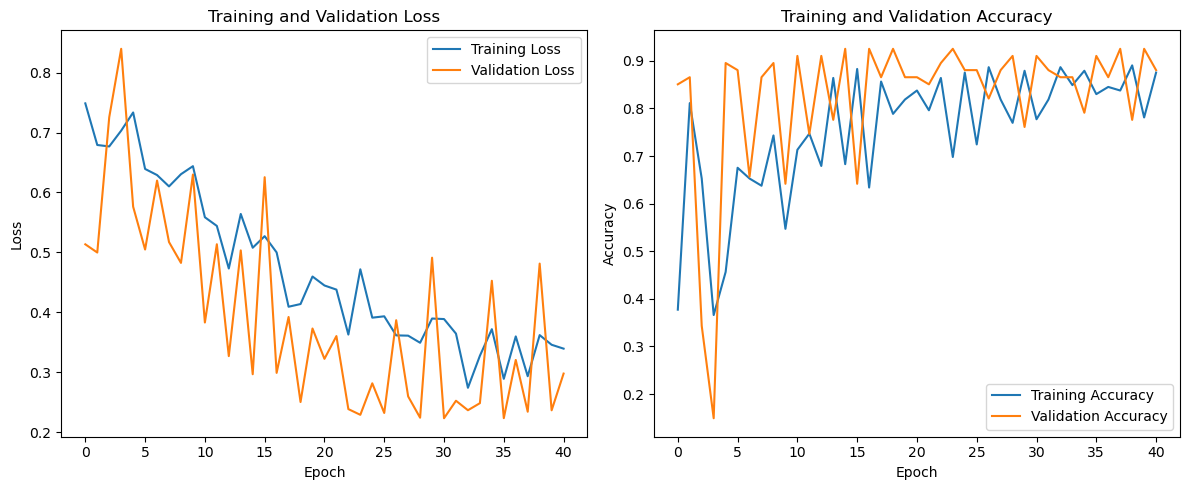

In [72]:
# Prepare cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Placeholder for model performance
precision_scores, recall_scores, f1_scores, roc_auc_scores = [], [], [], []

# Placeholder for the last fold's history and predictions
last_fold_history = None
last_fold_y_test = None
last_fold_y_pred_prob = None

for train_index, test_index in skf.split(sequences_array, data['Result']):
    # Splitting the data into training and testing sets
    X_train, X_test = sequences_array[train_index], sequences_array[test_index]
    y_train, y_test = stu_data['Result'].iloc[train_index], stu_data['Result'].iloc[test_index]

    # Define the RNN model
    model = Sequential([
        SimpleRNN(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
        Dropout(0.2),
        SimpleRNN(50, return_sequences=False),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Early stopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the model
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2,
                        class_weight=class_weights_dict, callbacks=[early_stopping], verbose=0)

    # Save the last fold's history for plotting
    last_fold_history = history
    last_fold_y_test = y_test
    last_fold_y_pred_prob = model.predict(X_test).ravel()

    # Calculate metrics
    precision = tf.keras.metrics.Precision()
    recall = tf.keras.metrics.Recall()
    precision.update_state(y_test, np.round(last_fold_y_pred_prob))
    recall.update_state(y_test, np.round(last_fold_y_pred_prob))
    precision_scores.append(precision.result().numpy())
    recall_scores.append(recall.result().numpy())
    f1_scores.append(2 * (precision.result().numpy() * recall.result().numpy()) /
                     (precision.result().numpy() + recall.result().numpy() + tf.keras.backend.epsilon()))
    
    # Calculate the ROC AUC score, handling NaN values if necessary
    if not np.isnan(last_fold_y_pred_prob).any() and not np.isnan(y_test).any():
        roc_auc_scores.append(roc_auc_score(y_test, last_fold_y_pred_prob))

# Print average scores across all folds
print(f'Average Precision: {np.mean(precision_scores):.2f}')
print(f'Average Recall: {np.mean(recall_scores):.2f}')
print(f'Average F1-Score: {np.mean(f1_scores):.2f}')
print(f'Average ROC AUC: {np.mean(roc_auc_scores):.2f}' if roc_auc_scores else "ROC AUC could not be calculated due to NaN values.")

# Evaluate the last fold
y_pred = np.round(last_fold_y_pred_prob)
print(confusion_matrix(last_fold_y_test, y_pred))
print(classification_report(last_fold_y_test, y_pred))
test_loss, test_accuracy = model.evaluate(X_test, y_test)
# Output the test metrics
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
roc_auc = roc_auc_score(last_fold_y_test, last_fold_y_pred_prob)
print(f'ROC AUC Score: {roc_auc:.2f}')

# Plotting the last fold's training and validation loss and accuracy
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(last_fold_history.history['loss'], label='Training Loss')
plt.plot(last_fold_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(last_fold_history.history['accuracy'], label='Training Accuracy')
plt.plot(last_fold_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
